## Homework 8

In the first problem I want you to think about loss functions for binary data. The second exercise prepares you for the "multinomial" case where we have more than 2 categories as outcome.

1. Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.
    * Predict the default probability on a regular array of balance values between on the interval $[0; 3000]$ and plot the resulting sigmoid-shaped curve.
    * Find those 4 balances which yield predicted probabilities (closest to) $\hat{p} = [0.5, 0.05, 0.005, 0.0005]$. 
    * Overlay these 4 points on the plot with a y value of $default=1$ (yes).
    * Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
        * Squared Error: $(y_i - \hat{p}_i)^2$
        * Log Loss: $y_i \cdot \log{\hat{p}_i}$
        * Hinge: `np.max(0, 1 - pHat * y)`
        * Accuracy: $y_i == (\hat{p}_i > 0.5)$
2. Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$). 
    * Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.
    * How could you combine these 3 models into one ?
    * Think about possible shortcomings of this "one verus the rest" strategy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm

In [2]:
df = pd.read_excel('../data/Default.xlsx')
df = df.sample(n=1000, random_state=1)
df["default"].value_counts()

No     967
Yes     33
Name: default, dtype: int64

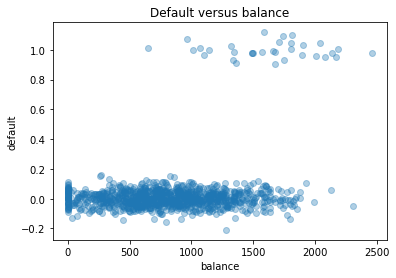

In [3]:
#add jitter to your plot:
N = df.shape[0]
df["default2"] = (df["default"] == "Yes")

df["defaultJitter"] = df["default2"] + 0.05*np.random.randn(N)
plt.scatter(df["balance"], df["defaultJitter"], alpha=0.35)
plt.xlabel('balance')
plt.ylabel('default')
plt.title('Default versus balance')
#plt.legend(['specificity', 'sensitivity'],fontsize=14)
plt.show();

In [4]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(0, 3000).reshape(-1,1)

clf = skl_lm.LogisticRegression()#solver='newton-cg'
clf.fit(X_train,y)
#compare to Table 4.1 which was obtained with R:
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

prob = clf.predict_proba(X_test)#
pHat = prob[:,1]

coefficients:  [[0.0042074]]
intercept : [-8.55199394]


In [13]:
TestPoints = np.zeros([4,2])
i=0
for p in [0.5,0.05,0.005, 0.0005]:
    idx = (np.abs(pHat - p)).argmin()
    TestPoints[i,1] = pHat[idx]
    TestPoints[i,0] = X_test[idx]
    i=i+1

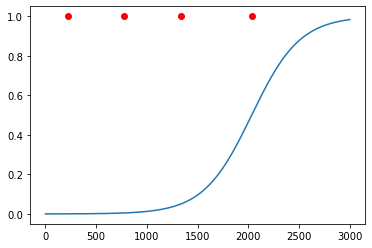

In [14]:
plt.plot(X_test, pHat)
plt.scatter(TestPoints[:,0], [1,1,1,1], color="r")

### Loss Functions

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

In [15]:
TestPoints

array([[2.03300000e+03, 5.00413407e-01],
       [1.33300000e+03, 5.00433115e-02],
       [7.75000000e+02, 5.01019498e-03],
       [2.26000000e+02, 4.99640891e-04]])

In [30]:
pHat=TestPoints[:,1]
# Squared Error: $(y_i - \hat{p}_i)^2$
print("Squared Error", (pHat-1)**2)
# Log Loss: $y_i \cdot \log{\hat{p}_i}$
print("Log Loss",np.log10(pHat))
# Hinge: `np.max(0, 1 - pHat * y)`
print("Hinge", 1-pHat)
# Accuracy: $y_i == (\hat{p}_i > 0.5)$
print("Accuracy", pHat>0.5)

Squared Error [0.24958676 0.90241771 0.99000471 0.99900097]
Log Loss [-0.30067106 -1.30065396 -2.30014537 -3.30134203]
Hinge [0.49958659 0.94995669 0.99498981 0.99950036]
Accuracy [ True False False False]


### Multinomial LR

Joshua's solution is much nicer than mine, so I am copying his:

In [33]:
from sklearn import datasets
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()

flower_types = iris['target_names']

X_iris = pd.DataFrame(iris['data'], columns=['sepal_length','sepal_width','petal_length','petal_width'])
y_iris = pd.get_dummies(pd.DataFrame(list(map(lambda x: flower_types[x], iris['target'])), columns=['target']))

X_iris.join(y_iris).head()

,sepal_length,sepal_width,petal_length,petal_width,target_setosa,target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [38]:
y_setosa = y_iris['target_setosa']

model_setosa = LogisticRegression()
model_setosa.fit(X_iris, y_setosa)
score = model_setosa.score(X_iris, y_setosa)

print('Model Training Accuracy: {}'.format(score))
print('\nConfusion Matrix:\n{}'.format(confusion_matrix(y_setosa, model_setosa.predict(X_iris))))
#plt.figure(figsize=(14,5))
#plt.subplot(1,2,1)
#sns.scatterplot(X_iris['sepal_length'], X_iris['sepal_width'], hue=y_setosa)
#plt.subplot(1,2,2)
#sns.scatterplot(X_iris['petal_length'], X_iris['petal_width'], hue=y_setosa)

Model Training Accuracy: 1.0

Confusion Matrix:
[[100   0]
 [  0  50]]


In [39]:
y_versicolor = y_iris['target_versicolor']

model_versicolor = LogisticRegression()
model_versicolor.fit(X_iris, y_versicolor)
score = model_versicolor.score(X_iris, y_versicolor)

print('Model Training Accuracy: {}'.format(score))
print('\nConfusion Matrix:\n{}'.format(confusion_matrix(y_setosa, model_setosa.predict(X_iris))))


Model Training Accuracy: 0.7266666666666667

Confusion Matrix:
[[100   0]
 [  0  50]]


In [40]:
y_virginica = y_iris['target_versicolor']

model_virginica = LogisticRegression()
model_virginica.fit(X_iris, y_virginica)
score = model_versicolor.score(X_iris, y_virginica)

print('Model Training Accuracy: {}'.format(score))
print('\nConfusion Matrix:\n{}'.format(confusion_matrix(y_setosa, model_setosa.predict(X_iris))))


Model Training Accuracy: 0.7266666666666667

Confusion Matrix:
[[100   0]
 [  0  50]]


#### Combining Three Models into One

In order to have do a multiclass Logistic Regression, you can do an All vs. Rest approach, which is what we did above, by training a different model for each different class, i.e. [setosa] vs. [versicolor, virginica], [versicolor] vs. [setosa, virginica], [virginica] vs. [setosa, versicolor]. We can do this process manually, and then when we have to predict on new data, we predict using the three models, and choose the model and corresponding class that gives the highest probability. If we don't want to do it manually, we can use the 'liblinear' solver within sklearn's Logistic Regression, which is the only one limited to one-versus-rest schemes.

In [41]:
multinomial_lr = LogisticRegression(solver='liblinear')
multinomial_lr.fit(X_iris, iris['target'])
print('Training Accuracy Score:')
multinomial_lr.score(X_iris, iris['target'])

Training Accuracy Score:


0.96

Another option to do a multiclass Logistic Regression is to use the other solvers within sklearn's Logistic Regression, like 'newton-cg', 'sag', 'saga' and 'lbgfs', which handle multinomial loss, and looks like perform a little better with default parameters. 

In [ ]:
multinomial_lr = LogisticRegression(solver='newton-cg', multi_class='multinomial')
multinomial_lr.fit(X_iris, iris['target'])
print('Training Accuracy Score:')
round(multinomial_lr.score(X_iris, iris['target']), 2)